# Data analysis

## Setup

In [1]:
# Load packages
library(readxl)
library(dplyr)
library(ggplot2)
library(stats)
library(stargazer)
library(purrr)
library(stringr)
library(tidyverse)
library(lubridate)
library(lessR)
library(fixest)
library(sandwich)
library(lmtest)
library(car)
library(effsize)


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'dplyr'"

Attachement du package : 'dplyr'


Les objets suivants sont masqu'es depuis 'package:stats':

    filter, lag


Les objets suivants sont masqu'es depuis 'package:base':

    intersect, setdiff, setequal, union


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'stargazer'"

Please cite as: 


 Hlavac, Marek (2022). stargazer: Well-Formatted Regression and Summary Statistics Tables.

 R package version 5.2.3. https://CRAN.R-project.org/package=stargazer 


Warning message in sprintf(gettext(fmt, domain = domain), ...):
"un argument est inutilis'e par le format '? avec la version R %s'"
Warning message:
"? avec la version R 'purrr'"
Warning message in sprintf(gettext(fmt, domain = domain), ..

In [ ]:
# Import the data
# Set the base directory path
base_directory <- "/Users/julienmbarki/Documents/Doctorat/Publications/Article 2/Data/Code/data_management/" #nolint 

# Create a list of file names
file_names <- c(
    "editorial_playlists_23-24_final.csv",
    "editorial_playlists_22-23_final.csv"
)

# Modify the data frame
df_list <- list()

for (i in seq_along(file_names)) {
    file_name <- file_names[i]

    full_path <- file.path(base_directory, file_name)
    df <- read_csv(full_path)

    # Append the data frame to the list
    df_list[[i]] <- df
}

# Combine all data frames
df <- Reduce(function(x, y) merge(x, y, all = TRUE), df_list)

# Export to Excel
write.csv(df, "df_final.csv")


## Data management

In [2]:
# Load data
df <- read.csv("df_final.csv")


### Main measure

In [3]:
# Extract numeric values
df$diversity_clean <- as.numeric(gsub("[^[:digit:].-]", "", df$stirling_index))
df$diversity_clean

df$diversity_clean_2 <- as.numeric(
    gsub("[^[:digit:].-]", "", df$stirling_index_2)
)
df$diversity_clean_2

# Scale values from 0 to 1
df$diversity_norm <- rescale(diversity_clean, df, kind = "z")
df$diversity_norm

df$diversity_norm_2 <- rescale(diversity_clean_2, df, kind = "z")
df$diversity_norm_2


[1] 0.14821499 0.21040297 0.16995606 0.21478651 0.20004147 0.26224445
   [7] 0.15385958 0.19517306 0.14304637 0.22921301 0.22209569 0.21940358
  [13] 0.16167994 0.16167994 0.16217212 0.15993847 0.26163923 0.17318455
  [19] 0.24574519 0.15779336 0.26447214 0.25624370 0.14963483 0.23924622
  [25] 0.16940248 0.16789395 0.28001868 0.17897381 0.29496455 0.23598171
  [31] 0.23189104 0.23711328 0.29373453 0.22364240 0.19359507 0.26402386
  [37] 0.22192388 0.19933859 0.26894970 0.27105987 0.22478600 0.18392964
  [43] 0.17339039 0.25703773 0.17452257 0.17452257 0.17437663 0.16757513
  [49] 0.21805899 0.21871158 0.22712033 0.31227438 0.28613876 0.28247340
  [55] 0.23235996 0.17969151 0.23340019 0.16247871 0.23916095 0.26962665
  [61] 0.16412267 0.26849039 0.21598788 0.22235792 0.16004803 0.16004803
  [67] 0.15795065 0.21680296 0.23648652 0.23832612 0.23177316 0.24582941
  [73] 0.22119805 0.22673813 0.18768368 0.24695571 0.19118140 0.18130600
  [79] 0.22286867 0.21079445 0.24987348 0.18403740 0.20910206 0.20959565
  [85] 0.22678054 0.22749871 0.22168315 0.17104936 0.23378283 0.24487203
  [91] 0.24150367 0.29574168 0.17942766 0.18714779 0.25207371 0.23626071
  [97] 0.24608829 0.24608829 0.27616821 0.30466577 0.24222438 0.27597133
 [103] 0.23744042 0.17082072 0.12538558 0.12357339 0.12357339 0.12357339
 [109] 0.12357339 0.12357339 0.12357339 0.12265249 0.12265249 0.12932128
 [115] 0.12932128 0.12660221 0.19357344 0.12399188 0.12399188 0.18859662
 [121] 0.13018452 0.18859662 0.18859662 0.18859662 0.18859662 0.18859662
 [127] 0.18859662 0.18859662 0.19317416 0.13893919 0.13893919 0.13893919
 [133] 0.18862010 0.12906205 0.12906205 0.21609056 0.15371451 0.15371451
 [139] 0.22301056 0.25854935 0.21938198 0.21091070 0.21091070 0.21927952
 [145] 0.21312798 0.21312798 0.20661763 0.20607069 0.14208159 0.14208159
 [151] 0.14208159 0.21646977 0.21646977 0.21623455 0.21631005 0.25309010
 [157] 0.13245071 0.13200183 0.13355801 0.12732553 0.18827313 0.18827313
 [163] 0.11892126 0.19049420 0.19049420 0.13156143 0.20249905 0.13201516
 [169] 0.20136441 0.12457155 0.19778334 0.13601133 0.14711377 0.15227331
 [175] 0.21724572 0.15254382 0.15254382 0.14611258 0.14641630 0.15443956
 [181] 0.22189572 0.14542376 0.22124687 0.22124687 0.14609970 0.14399221
 [187] 0.14399221 0.14291143 0.15040536 0.14896966 0.21065174 0.13989797
 [193] 0.14721139 0.14721139 0.14593628 0.14593628 0.14717077 0.21147735
 [199] 0.15487163 0.22650025 0.22901582 0.16527880 0.16527880 0.26998579
 [205] 0.26998579 0.26367159 0.26876859 0.23221691 0.26528272 0.26528272
 [211] 0.26528272 0.26528272 0.26528272 0.26528272 0.18794320 0.26528272
 [217] 0.23714888 0.24634106 0.24634106 0.24634106 0.24634106 0.32537419
 [223] 0.23696389 0.23696389 0.23696389 0.23696389 0.23696389 0.29607555
 [229] 0.22076254 0.22058154 0.22058154 0.22058154 0.16676577 0.16676577
 [235] 0.16676577 0.22901564 0.22119504 0.21565800 0.21565800 0.21622341
 [241] 0.16647495 0.29309732 0.17613586 0.17613586 0.24374759 0.24374759
 [247] 0.24374759 0.23359016 0.27375829 0.27466743 0.27375829 0.27560801
 [253] 0.21524745 0.21524745 0.14969177 0.21521070 0.21217069 0.15606885
 [259] 0.24012025 0.30274842 0.16140902 0.16140902 0.22278962 0.21853704
 [265] 0.24554144 0.16933059 0.21808466 0.17811804 0.22604434 0.22701278
 [271] 0.18016545 0.18016545 0.22541342 0.23320099 0.22541342 0.18016545
 [277] 0.22250716 0.17771612 0.17771612 0.17771612 0.23598000 0.23186198
 [283] 0.23049054 0.23410717 0.23372999 0.28738527 0.28657521 0.23719396
 [289] 0.23724622 0.23848023 0.23848023 0.23848023 0.23212334 0.17549539
 [295] 0.17549539 0.23618772 0.17549539 0.17880846 0.31747819 0.24849642
 [301] 0.18038760 0.18038760 0.29812910 0.29812910 0.18486793 0.18495382
 [307] 0.18001041 0.17940495 0.17940495 0.17052961 0.26244529 0.22887263
 [313] 0.15535355 0.19357725 0.19276658 0.24485310 0.15192208 0.15192208
 [319] 0.14651369 0.14440016 0.11220466 0.22101657 0.15502461 0.16241723
 [325] 0.19471417 0.19471417 0.20237274 0.16561205 0.21507823

[1] 0.3298393 0.2104030 0.2929499 0.2844848 0.3333531 0.3632840 0.3482481
   [8] 0.3326528 0.3315175 0.3206575 0.3220866 0.3065170 0.2422213 0.2422213
  [15] 0.2381001 0.2937828 0.3442624 0.3114476 0.3578369 0.3408313 0.3298078
  [22] 0.3632352 0.3512532 0.3309135 0.3475719 0.3063804 0.2800187 0.2882508
  [29] 0.3358666 0.3302863 0.3268322 0.3356705 0.3302567 0.3384790 0.3293188
  [36] 0.3057008 0.3379562 0.3527614 0.3323566 0.2710599 0.3308890 0.3505046
  [43] 0.3097491 0.3414703 0.2948008 0.2948008 0.3458432 0.2791039 0.3447077
  [50] 0.3405844 0.3248171 0.3646588 0.3616490 0.3734989 0.3538205 0.3487050
  [57] 0.3562192 0.3491630 0.3605939 0.3445819 0.3630250 0.3458931 0.3074884
  [64] 0.3279007 0.3298577 0.2639716 0.3307663 0.3184196 0.3060819 0.2815413
  [71] 0.3446803 0.3168995 0.2773952 0.3343377 0.3511123 0.3236458 0.3156696
  [78] 0.3565719 0.3351022 0.3263043 0.3465522 0.2826282 0.3284500 0.3345999
  [85] 0.3260560 0.3431162 0.3275938 0.3231455 0.3042328 0.3573253 0.3618440
  [92] 0.3323818 0.3470533 0.3524101 0.2520737 0.2811787 0.3219299 0.2985848
  [99] 0.2761682 0.3046658 0.3480228 0.3334382 0.3512993 0.3604546 0.2925924
 [106] 0.2503467 0.2503467 0.2503467 0.2503467 0.2503467 0.2503467 0.1226525
 [113] 0.2821404 0.3071203 0.3071203 0.2578073 0.3111369 0.2909435 0.2511891
 [120] 0.2713928 0.2713928 0.1885966 0.2713928 0.2713928 0.2713928 0.2713928
 [127] 0.2713928 0.2713928 0.1931742 0.3103469 0.3103469 0.2218647 0.2584737
 [134] 0.2584737 0.2584737 0.2804713 0.2804713 0.2804713 0.3215963 0.2585494
 [141] 0.3443487 0.3087685 0.3454775 0.3505876 0.2131280 0.2131280 0.3337787
 [148] 0.3328886 0.3261342 0.3261342 0.3261342 0.3401479 0.3327886 0.3242364
 [155] 0.3358596 0.3492100 0.3344969 0.3201965 0.2726692 0.3318762 0.3087557
 [162] 0.3087557 0.2642839 0.3322372 0.3322372 0.3261542 0.3294684 0.2432405
 [169] 0.3233916 0.3233916 0.3154602 0.2441152 0.3483069 0.3490824 0.3296433
 [176] 0.3288307 0.2945616 0.2941173 0.3402773 0.3527192 0.3475149 0.2946297
 [183] 0.3193868 0.3193868 0.3488854 0.2999631 0.2999631 0.2733720 0.3259256
 [190] 0.3255339 0.3380266 0.2490835 0.2521020 0.2521020 0.3217403 0.3217403
 [197] 0.3198577 0.3198577 0.3391041 0.2829106 0.3593798 0.3015128 0.3015128
 [204] 0.3562813 0.3562813 0.3218588 0.3483306 0.3488379 0.3513780 0.3513780
 [211] 0.3513780 0.3513780 0.3513780 0.3513780 0.3513780 0.3513780 0.3557110
 [218] 0.3915683 0.3557053 0.3915683 0.3557053 0.3915683 0.3722480 0.3722480
 [225] 0.3722480 0.3722480 0.3616203 0.3616203 0.3620177 0.3439429 0.3439429
 [232] 0.3584741 0.2813600 0.3631298 0.3556186 0.3484777 0.3567740 0.2156580
 [239] 0.2810332 0.3298227 0.3428281 0.2930973 0.3735884 0.3735884 0.3764137
 [246] 0.3832955 0.3659783 0.3397917 0.3429400 0.3429400 0.3283140 0.3386468
 [253] 0.3355864 0.3262652 0.3199540 0.3314453 0.3467518 0.3454602 0.3581616
 [260] 0.3431743 0.3571695 0.3570472 0.3638298 0.3555937 0.3450189 0.3622633
 [267] 0.3568253 0.3247667 0.3731164 0.3606216 0.3222062 0.3644435 0.3373781
 [274] 0.3222062 0.3573147 0.3649747 0.2713905 0.3429026 0.3625823 0.3554796
 [281] 0.3416733 0.3358112 0.3565399 0.3083847 0.3448949 0.3547384 0.3597505
 [288] 0.3460490 0.3413188 0.2384802 0.3261344 0.3268336 0.3465795 0.3215244
 [295] 0.3621708 0.3058604 0.3507959 0.3667009 0.3174782 0.3174782 0.3276654
 [302] 0.3608842 0.3735064 0.3498988 0.3686516 0.3584321 0.3264091 0.3249280
 [309] 0.3249280 0.3595150 0.3511410 0.3378730 0.3225155 0.2957863 0.3146708
 [316] 0.3146708 0.3288136 0.3288136 0.2915180 0.2982997 0.2659875 0.3488847
 [323] 0.3185340 0.2586255 0.3246465 0.3532413 0.3283836 0.3418803 0.2820717
 [330] 0.3549591 0.3542749 0.3209859 0.3311967 0.3404209 0.3312860 0.3393159
 [337] 0.3549270 0.3452883 0.3530071 0.3301846 0.3227729 0.3368195 0.3126279
 [344] 0.2923085 0.3207781 0.3263769 0.2830348 0.3147467 0.3006276 0.2742176
 [351] 0.3241280 0.2383323 0.2732467 0.3143117 0.2354885 0.3004372 0.2766013
 [358] 0.2766013 0.2766013 0.3145996 0.2637524 0.2435085 0.3273077 0.3564606

[1] -0.783  0.499 -0.335  0.590  0.285  1.568 -0.667  0.185 -0.890  0.887
  [11]  0.740  0.685 -0.506 -0.506 -0.496 -0.542  1.556 -0.268  1.228 -0.586
  [21]  1.614  1.445 -0.754  1.094 -0.346 -0.378  1.935 -0.149  2.243  1.027
  [31]  0.942  1.050  2.218  0.772  0.153  1.605  0.737  0.271  1.707  1.750
  [41]  0.796 -0.047 -0.264  1.461 -0.241 -0.241 -0.244 -0.384  0.657  0.671
  [51]  0.844  2.600  2.061  1.986  0.952 -0.134  0.973 -0.489  1.092  1.721
  [61] -0.455  1.697  0.614  0.746 -0.539 -0.539 -0.583  0.631  1.037  1.075
  [71]  0.940  1.230  0.722  0.836  0.031  1.253  0.103 -0.101  0.756  0.507
  [81]  1.313 -0.045  0.472  0.483  0.837  0.852  0.732 -0.312  0.981  1.210
  [91]  1.141  2.259 -0.140  0.020  1.359  1.032  1.235  1.235  1.856  2.443
 [101]  1.155  1.852  1.057 -0.317 -1.254 -1.292 -1.292 -1.292 -1.292 -1.292
 [111] -1.292 -1.311 -1.311 -1.173 -1.173 -1.229  0.152 -1.283 -1.283  0.049
 [121] -1.155  0.049  0.049  0.049  0.049  0.049  0.049  0.049  0.144 -0.975
 [131] -0.975 -0.975  0.050 -1.178 -1.178  0.616 -0.670 -0.670  0.759  1.492
 [141]  0.684  0.510  0.510  0.682  0.555  0.555  0.421  0.410 -0.910 -0.910
 [151] -0.910  0.624  0.624  0.619  0.621  1.380 -1.109 -1.118 -1.086 -1.214
 [161]  0.043  0.043 -1.388  0.089  0.089 -1.127  0.336 -1.118  0.313 -1.271
 [171]  0.239 -1.035 -0.806 -0.700  0.640 -0.694 -0.694 -0.827 -0.821 -0.655
 [181]  0.736 -0.841  0.723  0.723 -0.827 -0.871 -0.871 -0.893 -0.738 -0.768
 [191]  0.504 -0.955 -0.804 -0.804 -0.830 -0.830 -0.805  0.521 -0.646  0.831
 [201]  0.883 -0.432 -0.432  1.728  1.728  1.598  1.703  0.949  1.631  1.631
 [211]  1.631  1.631  1.631  1.631  0.036  1.631  1.051  1.240  1.240  1.240
 [221]  1.240  2.870  1.047  1.047  1.047  1.047  1.047  2.266  0.713  0.709
 [231]  0.709  0.709 -0.401 -0.401 -0.401  0.883  0.722  0.608  0.608  0.619
 [241] -0.407  2.205 -0.208 -0.208  1.187  1.187  1.187  0.977  1.806  1.825
 [251]  1.806  1.844  0.599  0.599 -0.753  0.598  0.536 -0.621  1.112  2.404
 [261] -0.511 -0.511  0.755  0.667  1.224 -0.348  0.658 -0.167  0.822  0.842
 [271] -0.124 -0.124  0.809  0.969  0.809 -0.124  0.749 -0.175 -0.175 -0.175
 [281]  1.027  0.942  0.913  0.988  0.980  2.087  2.070  1.052  1.053  1.078
 [291]  1.078  1.078  0.947 -0.221 -0.221  1.031 -0.221 -0.152  2.708  1.285
 [301] -0.120 -0.120  2.309  2.309 -0.027 -0.026 -0.128 -0.140 -0.140 -0.323
 [311]  1.573  0.880 -0.636  0.152  0.135  1.210 -0.707 -0.707 -0.819 -0.862
 [321] -1.526  0.718 -0.643 -0.491  0.176  0.176  0.334 -0.425  0.596 -0.297
 [331] -1.508  0.148  0.798  0.506  0.563 -1.039 -1.044 -0.853  0.776  1.589
 [341]  0.421 -0.734 -0.779  1.206 -0.975  0.331  0.200 -0.780 -0.480  0.424
 [351]  1.180  1.075 -0.225 -0.225  0.119 -0.075  0.119  0.119  0.119  0.258
 [361] -0.846 -0.858 -0.480 -0.392 -0.520  0.770  1.068 -0.778  0.932  0.462
 [371]  0.462 -0.916 -0.902 -0.712  0.786 -0.588 -0.828 -0.828  0.742  0.814
 [381] -0.766 -0.818 -0.800 -1.051  1.676 -1.313 -1.316  0.910 -0.269  0.927
 [391] -0.219 -0.112 -0.248  1.088  0.582 -0.844 -0.844  0.756 -1.071 -1.071
 [401] -1.069 -1.012 -0.506 -0.553 -0.763  0.312 -1.321 -0.085  0.034  0.034
 [411]  0.034 -0.927 -1.316 -1.076  0.310 -1.118  0.009  0.009  0.009  0.009
 [421]  0.009  0.009  0.009  0.009  0.009  0.009  0.009  0.009 -1.836 -0.022
 [431] -1.836 -1.836 -1.836 -0.022 -0.022 -0.022 -1.836 -0.022 -1.836 -1.836
 [441] -0.022 -1.836 -1.836 -1.836 -1.836 -0.022 -1.836 -1.836 -0.022 -1.836
 [451] -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836
 [461] -1.836 -1.836 -0.022 -0.022 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836
 [471] -1.836 -0.022 -1.836 -1.836 -1.836 -0.022 -0.022 -1.836 -0.022 -1.836
 [481] -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836 -1.836
 [491] -1.836 -1.836 -1.836 -0.022 -1.836 -0.022 -1.997 -2.020 -2.020 -2.020
 [501] -2.020 -2.020 -2.020 -2.020 -2.020 -2.020 -2.020 -1.897 -1.897 -1.897
 [511] -1.897 -1.897 -1.897 -1.897 -1.897 -1.897 -1.897 -1.897 -1.897 -1.897

[1]  0.466 -2.657 -0.498 -0.720  0.558  1.341  0.948  0.540  0.510  0.226
  [11]  0.264 -0.144 -1.825 -1.825 -1.933 -0.477  0.844 -0.015  1.199  0.754
  [21]  0.466  1.340  1.026  0.495  0.930 -0.147 -0.837 -0.621  0.624  0.478
  [31]  0.388  0.619  0.477  0.692  0.453 -0.165  0.679  1.066  0.532 -1.071
  [41]  0.494  1.007 -0.059  0.771 -0.450 -0.450  0.885 -0.860  0.855  0.747
  [51]  0.335  1.377  1.298  1.608  1.094  0.960  1.156  0.972  1.271  0.852
  [61]  1.334  0.886 -0.118  0.416  0.467 -1.256  0.491  0.168 -0.155 -0.797
  [71]  0.855  0.128 -0.905  0.584  1.023  0.304  0.096  1.166  0.604  0.374
  [81]  0.904 -0.768  0.430  0.591  0.367  0.814  0.408  0.291 -0.203  1.185
  [91]  1.303  0.533  0.917  1.057 -1.567 -0.806  0.260 -0.351 -0.937 -0.192
 [101]  0.942  0.561  1.028  1.267 -0.508 -1.613 -1.613 -1.613 -1.613 -1.613
 [111] -1.613 -4.952 -0.781 -0.128 -0.128 -1.417 -0.023 -0.551 -1.591 -1.062
 [121] -1.062 -3.227 -1.062 -1.062 -1.062 -1.062 -1.062 -1.062 -3.108 -0.043
 [131] -0.043 -2.357 -1.400 -1.400 -1.400 -0.825 -0.825 -0.825  0.251 -1.398
 [141]  0.846 -0.085  0.875  1.009 -2.586 -2.586  0.569  0.546  0.370  0.370
 [151]  0.370  0.736  0.544  0.320  0.624  0.973  0.588  0.214 -1.029  0.520
 [161] -0.085 -0.085 -1.248  0.529  0.529  0.370  0.457 -1.798  0.298  0.298
 [171]  0.090 -1.776  0.949  0.970  0.461  0.440 -0.456 -0.468  0.739  1.065
 [181]  0.929 -0.454  0.193  0.193  0.965 -0.315 -0.315 -1.010  0.364  0.354
 [191]  0.681 -1.646 -1.567 -1.567  0.255  0.255  0.205  0.205  0.709 -0.761
 [201]  1.239 -0.274 -0.274  1.158  1.158  0.258  0.950  0.963  1.030  1.030
 [211]  1.030  1.030  1.030  1.030  1.030  1.030  1.143  2.081  1.143  2.081
 [221]  1.143  2.081  1.576  1.576  1.576  1.576  1.298  1.298  1.308  0.835
 [231]  0.835  1.215 -0.801  1.337  1.141  0.954  1.171 -2.520 -0.810  0.466
 [241]  0.806 -0.494  1.611  1.611  1.684  1.864  1.412  0.727  0.809  0.809
 [251]  0.427  0.697  0.617  0.373  0.208  0.508  0.909  0.875  1.207  0.815
 [261]  1.181  1.178  1.355  1.140  0.863  1.314  1.172  0.334  1.598  1.271
 [271]  0.267  1.371  0.664  0.267  1.185  1.385 -1.062  0.808  1.323  1.137
 [281]  0.776  0.623  1.165 -0.095  0.860  1.118  1.249  0.890  0.767 -1.923
 [291]  0.370  0.388  0.904  0.249  1.312 -0.161  1.015  1.430  0.143  0.143
 [301]  0.410  1.278  1.608  0.991  1.481  1.214  0.377  0.338  0.338  1.243
 [311]  1.024  0.677  0.275 -0.424  0.070  0.070  0.440  0.440 -0.536 -0.358
 [321] -1.203  0.965  0.171 -1.396  0.331  1.078  0.428  0.781 -0.783  1.123
 [331]  1.105  0.235  0.502  0.743  0.504  0.714  1.123  0.870  1.072  0.475
 [341]  0.282  0.649  0.016 -0.515  0.229  0.376 -0.758  0.072 -0.298 -0.988
 [351]  0.317 -1.927 -1.014  0.060 -2.001 -0.303 -0.926 -0.926 -0.926  0.068
 [361] -1.262 -1.791  0.400  1.163  1.429  0.662 -0.049 -0.554 -0.629 -1.272
 [371]  0.206 -0.544 -0.307  1.119  1.030  1.315  1.467  1.467  1.512 -0.317
 [381]  1.210 -0.251  1.453  0.566  0.697  0.750  0.919  0.582  0.500  1.532
 [391]  1.614  0.097  1.178  0.105  1.570  1.449  1.449  1.065 -0.414 -0.414
 [401] -1.462  1.146  0.528  0.566  0.148  0.881  0.144  1.278  0.789  0.789
 [411]  0.789 -1.860  0.875 -0.295  0.506  1.042 -0.592  0.291 -0.592 -0.592
 [421]  0.291  0.291  0.291  0.291 -0.592 -0.592  0.291 -0.592 -0.571 -0.571
 [431] -2.008 -0.571 -0.246 -0.571 -0.571  0.012 -2.008 -0.571 -2.008 -0.571
 [441] -0.571 -0.571 -0.571 -0.571 -0.246 -0.571 -0.571 -0.571 -0.571 -0.571
 [451] -0.571 -0.571 -0.571 -0.571 -0.571 -0.571 -2.008 -0.571 -0.571  0.012
 [461] -2.008 -0.571 -0.571  0.012 -0.571 -0.571 -0.571 -0.571 -0.571 -0.571
 [471] -2.008 -0.571 -0.571 -2.008 -0.571 -0.246 -2.008 -0.571 -2.008 -0.571
 [481] -0.571 -0.571 -0.571 -0.571 -0.571 -0.571 -0.571 -0.571 -0.571  0.012
 [491] -0.571 -2.008 -2.008 -2.008 -0.571 -0.571 -0.800  0.104  0.104  0.104
 [501]  0.104  0.104  0.104  0.104  0.104  0.104  0.104 -0.467 -0.467 -0.467
 [511] -0.467 -0.467 -0.467 -0.467 -0.467 -0.467 -0.467 -0.467 -0.467 -0.467

### Secondary measures

In [4]:
# HH-Index
# Scale values from 0 to 1
df$hhi_norm <- rescale(hh_index, df, kind = "z")
df$hhi_norm

df$hhi_norm_2 <- rescale(hh_index_2, df, kind = "z")
df$hhi_norm_2


[1]  1.062 -0.320  0.926  0.186  0.585 -0.633  1.375  0.378  1.375 -0.719
  [11] -0.747 -0.875  0.805  0.805  0.805  0.926 -1.288  0.885 -0.946  1.508
  [21] -1.005 -1.094  1.508 -1.102  0.728  0.699 -1.666  0.699 -2.057 -1.060
  [31] -1.046 -1.046 -2.057 -0.519  0.464 -0.832 -0.099  0.464 -0.954 -1.416
  [41] -0.213  0.464  0.414 -1.331  0.357  0.357  0.378  0.699 -0.875 -0.548
  [51] -0.277 -2.271 -1.388 -1.488 -0.548  0.805 -0.783  1.211 -1.060 -1.837
  [61]  0.699 -1.502 -0.716 -0.704  0.528  0.528  0.464 -0.726 -1.117 -0.918
  [71] -0.761 -0.605 -0.519 -0.640  0.699 -0.889  0.528  0.606  0.008  0.378
  [81] -0.334  0.464  0.179  0.300 -0.676 -0.799 -0.818  0.414 -0.897 -0.868
  [91] -0.946 -1.659  0.606  0.606 -1.011 -0.818 -1.067 -1.067 -1.673 -2.121
 [101] -0.954 -1.701 -0.961  0.464  0.932  0.932  0.932  0.932  0.932  0.932
 [111]  0.932  1.238  1.238  0.844  0.844  0.976 -0.972  1.122  1.122 -0.732
 [121]  0.728 -0.732 -0.732 -0.732 -0.732 -0.732 -0.732 -0.732 -0.616  0.419
 [131]  0.419  0.419 -0.987  0.419  0.419 -0.802  0.844  0.844 -1.134 -1.652
 [141] -0.431 -0.230 -0.230 -0.612 -0.879 -0.879 -0.887 -0.805  0.663  0.663
 [151]  0.663 -0.879 -0.879 -0.612 -0.790 -1.643  0.440  0.663  0.396  0.767
 [161] -0.640 -0.640  1.062 -0.733 -0.733  0.528 -1.117  0.528 -1.046  1.062
 [171] -0.818  0.699  0.414  0.414 -0.918  0.357  0.357  0.528  0.699  0.357
 [181] -0.832  0.699 -0.719 -0.719  0.699  0.699  0.699  0.419  0.440  0.500
 [191] -1.124  0.885  0.440  0.440  0.396  0.396  0.396 -0.894  0.663 -1.117
 [201] -1.067  0.396  0.396 -1.777 -1.777 -1.488 -1.324 -1.018 -1.178 -1.178
 [211] -1.178 -1.178 -1.178 -1.178  1.354 -1.178  0.529  0.360  0.360  0.360
 [221]  0.360 -1.558  0.319  0.319  0.319  0.319  0.319 -1.405  0.478  0.478
 [231]  0.478  0.478  1.508  1.508  1.508  0.440  0.478  0.648  0.648  0.648
 [241]  1.508 -1.161  1.330  1.330  0.129  0.129  0.129 -0.636 -1.337 -1.408
 [251] -1.337 -1.470  0.187  0.187  1.425  0.187  0.187  1.282 -0.999 -1.700
 [261]  1.387  1.387  0.334  0.334 -1.005  1.112  0.334  0.990  0.254  0.117
 [271]  0.765  0.765  0.044 -0.269  0.044  0.765  0.083  0.791  0.791  0.791
 [281] -0.207 -0.141 -0.131 -0.244 -0.214 -1.748 -1.704 -0.311 -0.278 -0.278
 [291] -0.278 -0.278 -0.139  0.816  0.816 -0.155  0.816  0.762 -1.957 -0.315
 [301]  0.762  0.762 -1.747 -1.747  0.687  0.687  0.735  0.762  0.762  0.844
 [311] -0.756 -0.390  0.419 -0.338 -0.227 -1.643  0.500  0.500  0.767  0.440
 [321]  2.368 -0.598  0.500  0.528 -0.006 -0.006 -0.263  0.528 -0.071  0.464
 [331]  2.920  1.076 -0.412 -0.320 -0.776  0.805  0.699  0.805 -1.018 -1.302
 [341] -0.177  0.926  0.926 -1.345  0.699 -0.619 -0.156  1.211  0.805  0.092
 [351] -1.089 -1.146  0.869  0.869  0.051  0.499  0.051  0.051  0.051 -0.889
 [361]  0.767  0.926  0.414  0.350  0.926 -0.733 -1.217  0.414 -1.174 -0.897
 [371] -0.897  0.464  0.528  0.464 -0.719  0.528  1.211  1.211 -0.605 -0.719
 [381]  0.767  1.211  1.211  2.173 -1.409  2.657  2.657 -0.412  0.414 -0.419
 [391]  0.357  0.414  0.528 -0.519  0.478  1.745  1.745 -0.519  2.173  2.173
 [401]  1.952  1.952  0.699  0.663  1.167  0.455  2.368  1.308  1.108  1.108
 [411]  1.108  1.508  2.173  1.211  0.378  1.909 -0.559 -0.559 -0.559 -0.559
 [421] -0.559 -0.559 -0.559 -0.559 -0.559 -0.559 -0.559 -0.559  2.213 -0.621
 [431]  2.213  2.213  2.213 -0.621 -0.621 -0.621  2.213 -0.621  2.213  2.213
 [441] -0.621  2.213  2.213  2.213  2.213 -0.621  2.213  2.213 -0.621  2.213
 [451]  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213
 [461]  2.213  2.213 -0.621 -0.621  2.213  2.213  2.213  2.213  2.213  2.213
 [471]  2.213 -0.621  2.213  2.213  2.213 -0.621 -0.621  2.213 -0.621  2.213
 [481]  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213  2.213
 [491]  2.213  2.213  2.213 -0.621  2.213 -0.621  2.692  2.692  2.692  2.692
 [501]  2.692  2.692  2.692  2.692  2.692  2.692  2.692  2.446  2.446  2.446
 [511]  2.446  2.446  2.446  2.446  2.446  2.446  2.446  2.446  2.446  2.446

[1] -0.996  3.952  0.986  2.608 -0.398 -0.717 -0.384 -0.996 -1.169  0.055
  [11] -0.477  0.414  2.436  2.436  2.396 -0.265 -0.996  0.234 -1.054 -0.265
  [21]  0.621 -1.027 -1.027 -0.570 -0.744  0.667  1.438  1.212 -1.196 -0.863
  [31] -0.770 -0.956 -0.783 -0.850 -0.105  0.959 -0.730 -0.504 -0.211  1.903
  [41] -0.251 -1.009 -0.185 -0.943  0.520  0.520 -1.009  1.345 -1.076 -0.983
  [51] -0.278 -1.089 -0.743 -1.063 -0.437 -0.464 -0.890 -0.930 -1.049 -0.531
  [61] -1.063 -0.970  0.513 -0.650 -0.570  1.757 -0.956 -0.358  0.161  1.278
  [71] -0.836  0.307  1.225 -0.783 -0.477  0.174  0.414 -0.730 -0.118  0.161
  [81] -0.424  2.303 -0.570 -0.664 -0.544 -0.931 -0.531 -0.903  0.534 -0.956
  [91] -0.970 -0.238 -0.770 -0.823  2.662  1.398  0.294  1.119  1.425  0.587
 [101] -0.664 -0.238 -0.757 -0.983 -0.273  1.367  1.367  1.367  1.367  1.367
 [111]  1.367  6.862 -0.153 -0.427 -0.427  0.771 -0.845 -0.253  1.262  0.252
 [121]  0.252  3.182  0.252  0.252  0.252  0.252  0.252  0.252  3.398 -0.730
 [131] -0.730  2.503  0.714  0.714  0.714  1.320  1.320  1.320 -0.340  1.464
 [141] -0.946  0.295 -0.917 -0.902  2.907  2.907 -0.930 -0.971 -0.500 -0.500
 [151] -0.500 -1.054 -0.694 -0.653 -0.805 -1.221 -1.193 -0.376  0.344 -0.985
 [161] -0.092 -0.092  0.946 -0.970 -0.970 -0.570 -0.810  1.119 -0.717 -0.717
 [171] -0.597  1.717 -1.049 -1.142 -0.584 -0.584  0.440  0.786 -0.850 -0.943
 [181] -0.983  0.906 -0.012 -0.012 -1.103  0.081  0.081  1.118 -0.306 -0.556
 [191] -0.971  1.854  1.688  1.688 -0.168 -0.168 -0.403 -0.403 -0.667  0.732
 [201] -0.936  0.303  0.303 -1.027 -1.027 -0.145 -0.703 -1.089 -0.475 -0.475
 [211] -0.475 -0.475 -0.475 -0.475 -0.475 -0.475  0.178 -0.845  0.073 -0.845
 [221]  0.073 -0.845 -0.319 -0.319 -0.319 -0.319 -0.078 -0.078 -0.722 -0.057
 [231] -0.057 -0.570  1.812 -0.750 -0.486 -0.002 -0.556  5.760  1.771  0.151
 [241]  0.151  2.380 -0.293 -0.293 -0.320 -0.542 -0.085 -0.498 -0.403 -0.403
 [251]  0.161 -0.575 -0.145  0.075  0.142 -0.584 -1.062 -0.403 -0.718 -0.355
 [261] -0.650 -0.640 -0.709 -0.650  0.191 -0.917 -0.590  1.001 -0.986 -0.432
 [271]  0.763 -1.225  0.154  0.763 -0.892 -1.264  1.984 -0.057 -1.192 -0.936
 [281] -0.250  0.124 -0.802  0.853 -0.289 -0.668 -0.930 -0.075 -0.139  4.031
 [291]  0.552  0.552 -0.479  0.758 -0.882  1.010 -0.659 -1.040  0.895  0.895
 [301]  0.755 -0.698 -0.900 -0.034 -0.838 -0.530  0.672  0.727  0.727 -0.530
 [311] -0.034  0.231 -0.282  0.122 -0.334 -0.334 -0.736 -0.736  0.566  0.344
 [321]  1.522 -0.667 -0.126  2.183  0.667 -1.076 -0.398 -0.850  2.622 -0.504
 [331] -0.624 -0.105 -0.025 -1.023 -0.531 -0.717 -0.930 -0.903 -1.049 -0.371
 [341]  0.041 -0.903  0.041  0.560 -0.491 -0.717  0.879  0.068  0.627  1.272
 [351] -0.185  2.409  1.265 -0.185  2.196  0.108  1.079  1.079  1.079 -0.836
 [361]  1.203  1.877 -0.451 -0.637 -1.049 -0.544  0.188  0.028  0.001  0.919
 [371] -0.717  0.108 -0.078 -1.009 -0.783 -0.930 -1.049 -1.049 -1.076  0.480
 [381] -1.040  0.520 -1.063  0.028 -0.225 -0.105 -0.451 -0.092  0.294 -0.717
 [391] -0.597  1.504 -0.278  1.238 -0.251 -0.132 -0.132  0.041  1.438  1.438
 [401]  2.781 -0.105  0.800 -0.611  0.594  0.137  0.511 -0.653  0.372  0.372
 [411]  0.372  4.388 -0.570  0.374  0.560 -0.334  0.002 -0.586  0.002  0.002
 [421] -0.586 -0.586 -0.586 -0.586  0.002  0.002 -0.586  0.002  0.028  0.028
 [431]  1.600  0.028 -0.535  0.028  0.028 -0.752  1.600  0.028  1.600  0.028
 [441]  0.028  0.028  0.028  0.028 -0.535  0.028  0.028  0.028  0.028  0.028
 [451]  0.028  0.028  0.028  0.028  0.028  0.028  1.600  0.028  0.028 -0.752
 [461]  1.600  0.028  0.028 -0.752  0.028  0.028  0.028  0.028  0.028  0.028
 [471]  1.600  0.028  0.028  1.600  0.028 -0.535  1.600  0.028  1.600  0.028
 [481]  0.028  0.028  0.028  0.028  0.028  0.028  0.028  0.028  0.028 -0.752
 [491]  0.028  1.600  1.600  1.600  0.028  0.028  0.258 -0.906 -0.906 -0.906
 [501] -0.906 -0.906 -0.906 -0.906 -0.906 -0.906 -0.906 -0.266 -0.266 -0.266
 [511] -0.266 -0.266 -0.266 -0.266 -0.266 -0.266 -0.266 -0.266 -0.266 -0.266

In [5]:
# Distances
# Scale values from 0 to 1
df$dist_norm <- rescale(distances, df, kind = "z")
df$dist_norm

df$dist_norm_2 <- rescale(distances_2, df, kind = "z")
df$dist_norm_2

df$dist_norm_3 <- rescale(distances_3, df, kind = "z")
df$dist_norm_3


[1] -0.642  0.421 -0.335  1.141  1.396  2.436 -0.259  1.482 -0.488  0.628
  [11]  0.461  0.268 -0.582 -0.582 -0.573 -0.523  2.243 -0.308  0.855 -0.039
  [21]  1.036  0.747 -0.220  0.391 -0.500 -0.549  2.885 -0.352  1.674  0.414
  [31]  0.394  0.500  1.753  0.548 -0.279  1.995  1.000 -0.182  2.064  1.356
  [41]  1.342 -0.441 -0.651  1.204 -0.669 -0.669 -0.658 -0.554  0.292  0.800
  [51]  1.254  1.571  1.877  1.428  0.996 -0.254  0.510 -0.233  0.375  0.871
  [61] -0.615  1.295  0.422  0.515 -0.801 -0.801 -0.877  0.387  0.317  0.505
  [71]  0.517  1.014  0.484  0.607 -0.198  0.588 -0.271 -0.382  1.938  2.049
  [81]  2.488 -0.439  1.176  1.254  0.557  0.720  0.657 -0.690  0.381  0.595
  [91]  0.813  2.819 -0.414 -0.280  0.895  0.855  0.513  0.513  1.372  1.745
 [101]  0.544  1.390  0.462 -0.661 -1.168 -1.202 -1.202 -1.202 -1.202 -1.202
 [111] -1.202 -1.021 -1.021 -1.148 -1.148 -1.118 -0.168 -1.074 -1.074 -0.061
 [121] -1.200 -0.061 -0.061 -0.061 -0.061 -0.061 -0.061 -0.061  0.087 -1.219
 [131] -1.219 -1.219 -0.285 -1.383 -1.383  0.421 -0.700 -0.700  0.119  1.057
 [141]  0.605  0.868  0.868  0.438  0.119  0.119  0.026  0.077 -1.028 -1.028
 [151] -1.028  0.224  0.224  0.414  0.365  0.895 -1.316 -1.205 -1.320 -1.230
 [161] -0.023 -0.023 -1.212  0.010  0.010 -1.286 -0.228 -1.278 -0.153 -1.102
 [171]  0.034 -1.114 -1.086 -1.001  0.144 -1.029 -1.029 -1.038 -0.929 -0.998
 [181]  0.385 -0.947  0.464  0.464 -0.935 -0.972 -0.972 -1.153 -1.017 -1.006
 [191] -0.050 -0.927 -1.070 -1.070 -1.116 -1.116 -1.095  0.101 -0.803  0.170
 [201]  0.221 -0.796 -0.796  0.972  0.972  0.964  1.189  0.325  2.657  2.657
 [211]  2.657  2.657  2.657  2.657  2.471  2.657  1.922  1.928  1.928  1.928
 [221]  1.928  3.130  1.460  1.460  1.460  1.460  1.460  2.038  1.560  1.550
 [231]  1.550  1.550  0.159  0.159  0.159  1.724  1.600  1.654  1.654  1.669
 [241]  0.152  2.181  0.166  0.166  1.721  1.721  1.721  0.844  1.640  1.611
 [251]  1.640  1.577  1.143  1.143 -0.300  1.165  1.107 -0.300  0.683  2.410
 [261] -0.086 -0.086  1.414  1.339  0.695 -0.187  1.326 -0.126  1.259  1.162
 [271] -0.278 -0.278  1.039  0.925  1.039 -0.278  1.024 -0.301 -0.301 -0.301
 [281]  1.009  1.009  1.015  0.979  0.965  1.344  1.362  0.962  1.018  1.035
 [291]  1.035  1.035  1.059 -0.322 -0.322  1.128 -0.322 -0.305  2.358  1.207
 [301] -0.277 -0.277  1.601  1.601 -0.257 -0.255 -0.305 -0.295 -0.295 -0.391
 [311]  1.764  0.844 -0.947  0.817  0.592  1.003 -0.956 -0.956 -0.884 -1.117
 [321] -0.170  0.754 -0.904 -0.761  1.034  1.034  1.082 -0.706  1.269 -0.644
 [331]  0.850  1.967  0.901  0.893  0.240 -1.053 -1.121 -0.889  0.349  1.785
 [341]  0.896 -0.698 -0.739  1.365 -1.062  0.418  0.426 -0.519 -0.559  0.598
 [351]  1.470  1.402  0.787  0.787  0.474  0.588  0.474  0.474  0.474  0.070
 [361] -0.907 -0.810 -0.824 -0.793 -0.503  0.486  2.623 -1.064  1.271  0.019
 [371]  0.019 -1.148 -1.101 -0.982  0.529 -0.842 -0.566 -0.566  0.550  0.485
 [381] -0.838 -0.556 -0.538  0.218  1.878  0.633  0.628  1.464 -0.654  1.253
 [391] -0.652 -0.529 -0.561  0.993  1.546 -0.067 -0.067  0.816  0.191  0.191
 [401] -0.095 -0.025 -0.659 -0.724 -0.538  1.888  0.127  2.238  2.130  2.130
 [411]  2.130 -0.405 -0.137 -0.810  1.897 -0.206  0.260  0.260  0.260  0.260
 [421]  0.260  0.260  0.260  0.260  0.260  0.260  0.260  0.260 -0.794  0.223
 [431] -0.794 -0.794 -0.794  0.223  0.223  0.223 -0.794  0.223 -0.794 -0.794
 [441]  0.223 -0.794 -0.794 -0.794 -0.794  0.223 -0.794 -0.794  0.223 -0.794
 [451] -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794
 [461] -0.794 -0.794  0.223  0.223 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794
 [471] -0.794  0.223 -0.794 -0.794 -0.794  0.223  0.223 -0.794  0.223 -0.794
 [481] -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794 -0.794
 [491] -0.794 -0.794 -0.794  0.223 -0.794  0.223 -0.442 -0.480 -0.480 -0.480
 [501] -0.480 -0.480 -0.480 -0.480 -0.480 -0.480 -0.480 -0.615 -0.615 -0.615
 [511] -0.615 -0.615 -0.615 -0.615 -0.615 -0.615 -0.615 -0.615 -0.615 -0.615

[1]  0.571 -2.705 -0.728  0.434  0.883  1.093  0.985 -0.010 -0.234 -0.327
  [11]  0.307  0.099 -1.240 -1.240 -1.235 -0.917  0.948  0.891  1.246  1.155
  [21]  0.651  0.852  0.473 -0.536  0.693  0.047  0.201  0.285 -0.004  0.196
  [31] -0.610 -0.313 -0.690  0.847  0.712  0.655  0.424  1.280  1.003 -1.603
  [41]  0.756  0.980 -0.412  0.409 -0.467 -0.467  0.298 -0.843  0.214 -0.030
  [51] -0.409  0.811  0.402  1.225  0.648  1.704  1.187  0.363  0.763  0.911
  [61]  1.287  0.435  0.386  0.701  0.392 -1.621 -0.294  0.073 -0.636 -0.613
  [71]  1.040  0.342 -0.533  0.595  1.309  0.871  0.475  1.707  0.297  1.343
  [81]  1.543  0.238  0.047  0.031  0.219  0.339  0.115 -0.930  0.397  1.253
  [91]  1.238 -0.050  0.560  0.700 -2.147 -1.369 -0.460 -0.661 -1.584 -1.143
 [101]  0.597 -0.174 -0.049 -0.039 -0.121 -0.166 -0.166 -0.166 -0.166 -0.166
 [111] -0.166 -4.408 -1.579 -0.547 -0.547 -1.787 -0.652 -0.713 -1.554 -1.089
 [121] -1.089 -3.274 -1.089 -1.089 -1.089 -1.089 -1.089 -1.089 -3.101 -0.375
 [131] -0.375 -1.831 -1.909 -1.909 -1.909 -0.826 -0.826 -0.826 -0.341 -1.955
 [141] -0.231 -0.403  0.623  0.827 -3.063 -3.063 -0.310 -0.426 -0.026 -0.026
 [151] -0.026 -0.419 -0.343 -1.018 -0.459 -0.361 -0.225 -0.089 -1.895 -0.062
 [161]  0.155  0.155 -1.443 -0.013 -0.013 -0.086 -0.104 -2.622 -0.740 -0.740
 [171] -0.584 -2.231 -0.014  0.077 -0.157 -0.834 -1.436 -1.317 -0.402  0.071
 [181] -0.012 -1.224 -0.469 -0.469  0.165 -1.027 -1.027 -1.332 -0.055 -0.179
 [191]  0.153 -1.997 -2.003 -2.003 -0.576 -0.576 -0.685 -0.685  0.484 -1.109
 [201]  0.456 -1.460 -1.460  0.400  0.400  0.051  0.703  0.070  1.891  1.891
 [211]  1.891  1.891  1.891  1.891  1.891  1.891  1.139  1.696  0.387  1.696
 [221]  0.387  1.696  1.261  1.261  1.261  1.261  0.884  0.884  0.551  0.518
 [231]  0.518  0.748 -0.979  0.933  0.974  0.994  0.708 -1.251 -1.009 -0.050
 [241]  0.868 -0.630  1.210  1.210  1.437  1.655  1.325  0.101  0.893  0.893
 [251]  0.114 -0.063  0.311  0.138  0.189  0.286  0.306  1.330  1.416  1.271
 [261]  1.335  1.355  0.984  0.839  0.843  0.885  0.846  0.674  1.126  1.390
 [271]  0.036  0.292  0.134  0.036  0.239  0.260 -1.363  0.286  0.349  0.235
 [281]  0.083  0.081  1.109 -0.797  0.273  0.692  0.834  0.745  0.157 -1.981
 [291] -0.230 -0.200  0.482  0.090  0.810 -0.487  0.148  0.944 -0.420 -0.420
 [301]  0.165  0.752  1.124  0.622  0.764  0.542  0.109  0.116  0.116  1.679
 [311]  0.442  0.174  0.788 -0.113  0.937  0.937  0.451  0.451 -0.481  0.277
 [321] -0.537  0.442  0.231 -1.589  0.635  0.460  0.935  1.225  0.713  1.277
 [331]  1.999 -0.652  0.010  0.697  0.926  1.373  1.463  1.277  0.943  0.792
 [341]  1.122  0.152 -0.285  1.036  1.242  0.636 -0.248 -0.195 -0.227 -0.790
 [351]  1.236 -1.549  0.416  1.432 -1.754  0.204  0.049  0.049  0.049  0.476
 [361]  0.443 -0.231  1.736  1.661  1.287  1.598  0.699  0.071 -1.145 -1.415
 [371]  0.979 -1.320 -1.026  0.888 -0.142  0.624  0.499  0.499  0.760 -1.177
 [381]  1.185 -0.798  0.964  0.966  1.667  1.704  2.357  0.243  0.832  1.229
 [391]  1.756  0.332  0.122 -0.182  1.456  0.834  0.834  0.744 -0.417 -0.417
 [401] -1.145  1.024  1.552  1.620  1.588  2.093  0.345  1.632  2.367  2.367
 [411]  2.367  0.064  2.117  0.138  2.056  1.915 -1.346  0.808 -1.346 -1.346
 [421]  0.808  0.808  0.808  0.808 -1.346 -1.346  0.808 -1.346 -1.260 -1.260
 [431] -2.310 -1.260 -1.070 -1.260 -1.260 -0.581 -2.310 -1.260 -2.310 -1.260
 [441] -1.260 -1.260 -1.260 -1.260 -1.070 -1.260 -1.260 -1.260 -1.260 -1.260
 [451] -1.260 -1.260 -1.260 -1.260 -1.260 -1.260 -2.310 -1.260 -1.260 -0.581
 [461] -2.310 -1.260 -1.260 -0.581 -1.260 -1.260 -1.260 -1.260 -1.260 -1.260
 [471] -2.310 -1.260 -1.260 -2.310 -1.260 -1.070 -2.310 -1.260 -2.310 -1.260
 [481] -1.260 -1.260 -1.260 -1.260 -1.260 -1.260 -1.260 -1.260 -1.260 -0.581
 [491] -1.260 -2.310 -2.310 -2.310 -1.260 -1.260 -1.143 -0.032 -0.032 -0.032
 [501] -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.032 -0.769 -0.769 -0.769
 [511] -0.769 -0.769 -0.769 -0.769 -0.769 -0.769 -0.769 -0.769 -0.769 -0.769

[1] -0.245 -0.457  0.225  0.544  0.644  1.302  0.505 -0.253 -0.741 -0.221
  [11] -0.659 -0.727 -0.727 -0.727 -1.100 -0.924  0.194  0.356  0.471  0.372
  [21]  0.829  0.647  0.162  0.347  0.473  0.264 -0.253  0.072 -0.811 -1.019
  [31] -1.057 -0.388 -0.494 -0.247  0.149  0.161 -0.051  0.190  0.165  0.008
  [41]  0.000  0.000 -0.728 -0.645 -0.645 -0.645 -0.455 -0.475 -0.327 -0.150
  [51] -0.179  1.408  1.629  1.731  1.165  0.915  0.766  0.477  0.669  0.430
  [61]  0.915  0.157 -0.085 -0.316 -0.316 -0.316 -0.302 -0.504 -0.043 -0.219
  [71] -0.540  0.140 -0.605 -0.553  0.269  0.241  0.077  0.413  0.433 -0.131
  [81]  0.321  0.424  0.024  0.038 -0.219 -0.162 -0.184 -0.933 -0.558 -0.130
  [91]  0.119  0.045 -0.041  0.473  1.025  0.904  0.940  0.940  0.940  0.944
 [101]  0.879  0.830  0.930  0.958 -0.394 -0.435 -0.435 -0.435 -0.435 -0.435
 [111] -0.435 -0.187 -0.187 -0.436 -0.436 -0.733 -0.733 -0.520 -0.520 -0.645
 [121] -0.645 -0.645 -0.645 -0.645 -0.645 -0.645 -0.645 -0.645 -0.272 -0.272
 [131] -0.272 -0.272 -0.687 -0.687 -0.687  0.686  0.686  0.686  0.602  0.537
 [141]  0.715  0.729  0.729  1.117  0.535  0.535  0.342  0.273  0.405  0.405
 [151]  0.405  0.583  0.583  0.635  0.997  0.858  0.062  0.307  0.145 -0.335
 [161] -0.362 -0.362 -0.206 -0.158 -0.158 -0.148 -0.059 -0.129 -0.024 -0.024
 [171]  0.013  0.286  0.524  0.525  0.557  0.717  0.717  0.772  0.905  1.011
 [181]  0.698  0.698  0.507  0.507  0.507  0.760  0.760  0.733  1.281  1.064
 [191]  0.785  0.979  0.899  0.899  0.885  0.885  0.851  0.851  1.492  1.451
 [201]  1.631  1.504  1.504  1.514  1.514  1.423  1.673  1.045  0.214  0.214
 [211]  0.214  0.214  0.214  0.214  0.214  0.214  1.337  1.602  1.602  1.602
 [221]  1.602  1.602  1.509  1.509  1.509  1.509  1.509  1.509  0.926  0.869
 [231]  0.869  0.869  0.828  0.828  0.828  1.290  0.887  0.834  0.834  0.781
 [241]  1.140  1.604  1.639  1.639  1.726  1.726  1.726  0.119  0.119  0.119
 [251]  0.119  0.131  0.369  0.369 -0.214 -0.214 -0.266  0.201  0.333  0.333
 [261]  0.577  0.577  0.778  0.695  0.673  0.724  0.746  0.690  0.610  0.582
 [271]  0.315  0.315  0.315  0.315  0.315  0.315  0.250  0.250  0.250  0.250
 [281]  0.498  0.394  0.396  0.435  0.435  0.595  0.539  0.534  0.879  0.912
 [291]  0.912  0.912  0.757  0.745  0.745  0.745  0.745  0.847  1.063  1.063
 [301]  0.887  0.887  1.098  1.098  1.098  0.966  0.859  0.782  0.782  0.522
 [311]  0.689  0.689 -0.335 -0.843 -0.719 -0.719 -0.352 -0.352 -0.067 -0.509
 [321] -0.087  0.491  0.228  0.682  0.000  0.000 -0.454 -0.490  0.309  0.805
 [331]  0.604  0.944  0.881  0.019  0.445  0.237  0.641  0.358  0.519  0.310
 [341]  0.298  0.188  0.168  0.010 -0.284 -0.284 -0.509  0.061 -0.088 -0.223
 [351] -0.191 -0.420 -0.795 -0.795 -0.795 -0.795 -0.795 -0.795 -0.795 -1.063
 [361] -0.978 -0.747  0.344  0.923  0.371  0.109 -0.135 -0.373 -0.352 -0.256
 [371] -0.256 -0.001  0.341  0.736  1.022  1.128  1.172  1.172  0.794  0.545
 [381]  0.461  0.876  1.144  0.988  0.595  0.725  0.641  0.963  0.963  1.292
 [391]  1.496  2.057  1.967  1.914  1.276  1.403  1.403  0.687  0.687  0.687
 [401]  0.579  0.508  0.155 -0.234  0.204  0.298  0.609  0.609  0.682  0.682
 [411]  0.682  0.600  0.284  0.280  1.243  1.099  0.383  0.383  0.383  0.383
 [421]  0.383  0.383  0.383  0.383  0.383  0.383  0.383  0.383  0.335  0.335
 [431]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [441]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [451]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [461]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [471]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [481]  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335  0.335
 [491]  0.335  0.335  0.335  0.335  0.335  0.335  0.517  0.325  0.325  0.325
 [501]  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325
 [511]  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325  0.325

### Covariates

In [6]:
# Relevel factors
#df$type <- relevel(as.factor(df$type), ref = "genre")
#table(df$type)


df$curator <- relevel(as.factor(df$playlist_type), ref = "Editorial")
table(df$curator)



Editorial 
     6343 

In [ ]:
# Log Followers
df$log_followers <- log(df$playlist_followers)
df$log_followers

# Followers class
summary(df$playlist_followers)
df$followers_class <- case_when(
    df$playlist_followers <= 81624 ~ "low",
    df$playlist_followers > 81624 &
    df$playlist_followers <= 238625 ~ "mid_low",
    df$playlist_followers > 238625 &
    df$playlist_followers <= 755174 ~ "mid_high",
    df$playlist_followers > 755174 ~ "high"
)
table(df$followers_class)


In [8]:
# Playlist dates
df <- df %>%
    mutate(
        collection_date = as.Date(collection_date),
        mean_track_date = as.Date(mean_track_date)
    ) %>%
    mutate(
        playlist_date = case_when(
            mean_track_date > collection_date - dyears(1.5) ~ "frontline",
            TRUE ~ "backline"
        )
    )

df$playlist_date <- relevel(as.factor(df$playlist_date), ref = "frontline")
table(df$playlist_date)



frontline  backline 
     2949      3394 

## Descriptive stats

### Stats

In [10]:
# Number of tracks per playlist
summary(df$nb_tracks)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  20.00   47.00   50.00   55.29   64.00  108.00 

In [11]:
# Number of clusters per playlist
summary(df$nb_clusters)

summary(df$nb_clusters_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   2.00    2.00    3.00    2.65    3.00    6.00 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  1.000   6.000   8.000   7.561   9.000  10.000 

In [12]:
# HH-Index
summary(df$hh_index)

summary(df$hh_index_2)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1912    3554    5000    4607    5352    8644 

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1050    1451    1712    1871    2120   10000 

In [ ]:
tapply(df$mean_distance, df$type, mean)


### Plots

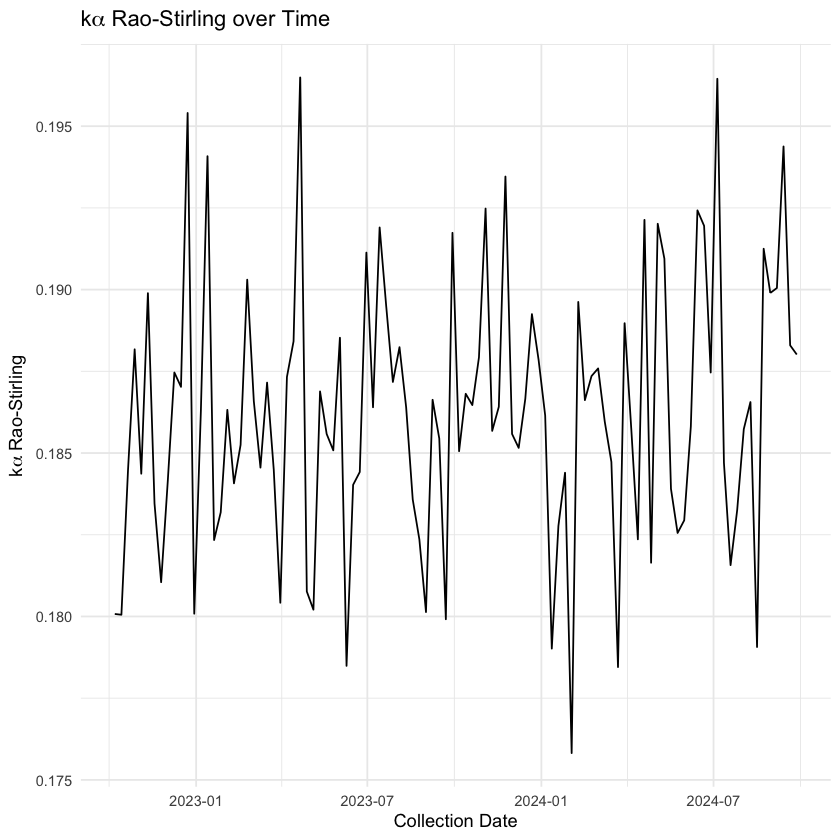

In [17]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_stirling)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = expression(k*alpha*" Rao-Stirling over Time"), #nolint
        x = "Collection Date",
        y = expression(k*alpha*" Rao-Stirling") #nolint
    ) +
  theme_minimal()


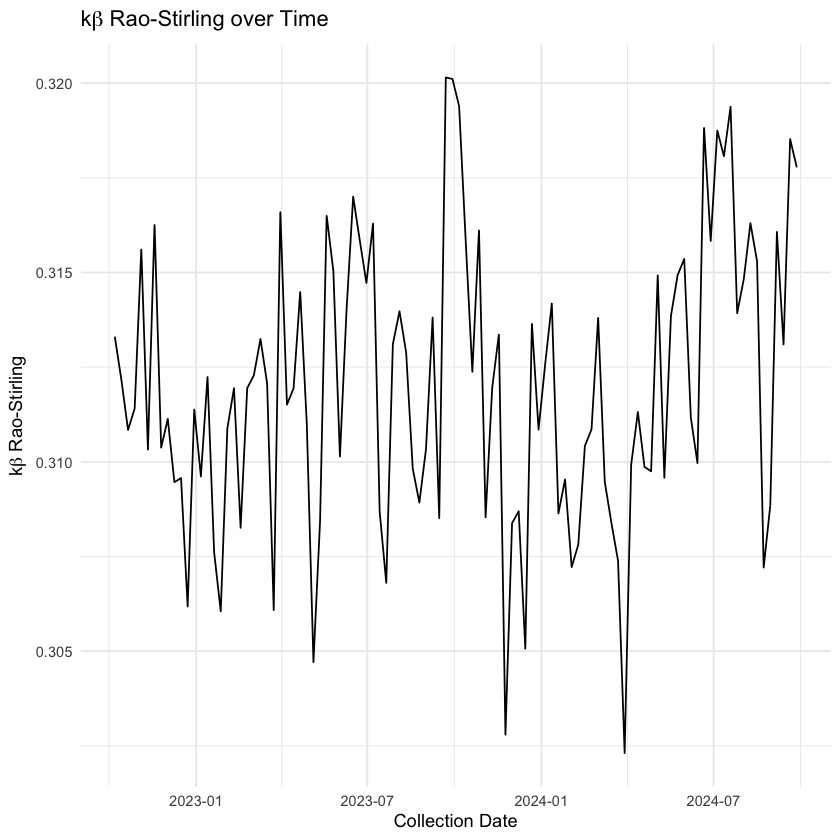

In [18]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_stirling = mean(diversity_clean_2))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_stirling)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = expression(k*beta*" Rao-Stirling over Time"), #nolint
        x = "Collection Date",
        y = expression(k*beta*" Rao-Stirling") #nolint
    ) +
  theme_minimal()


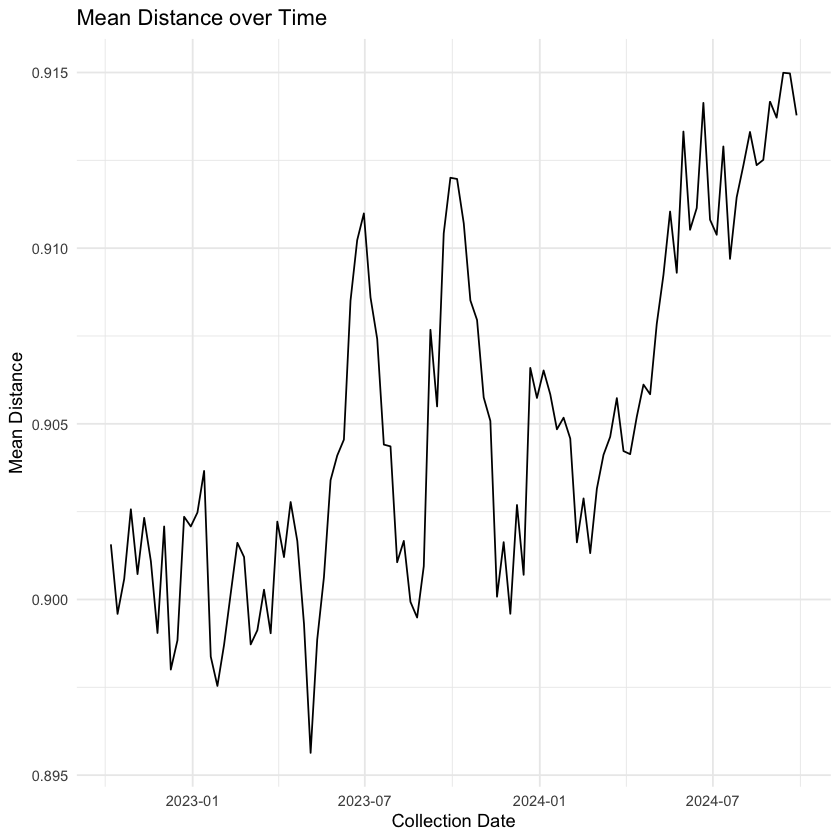

In [19]:
# Basic time series plot of stirling_index vs collection_date
df_mean <- df %>%
  group_by(collection_date) %>%
  summarize(mean_distances = mean(distances_3))

ggplot(
        df_mean,
        aes(x = collection_date, y = mean_distances)
    ) +
    geom_line() +
    #geom_point() +
    labs(
        title = "Mean Distance over Time",
        x = "Collection Date",
        y = "Mean Distance"
    ) +
  theme_minimal()


In [ ]:
# Extract unique diversity values per playlist
playlist_diversity <- df %>%
  distinct(playlist_name, diversity_clean)

# Plot the histogram using one observation per playlist
ggplot(
  playlist_diversity,
  aes(x = diversity_clean)
  ) +
  geom_histogram(
    binwidth = 0.025,
    color = "black",
    fill = "#a7a7f9"
    ) +
  xlim(0, 0.5) +
  theme_bw() +
  theme(
    panel.grid.major.y = element_line(linetype = "dotted"),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    aspect.ratio = 0.8
  ) +
  labs(
    x = expression(k*alpha*" Rao-Stirling"), #nolint
    y = "Frequency"
  )


In [ ]:
# Extract unique diversity values per playlist
playlist_diversity <- df %>%
  distinct(playlist_name, diversity_clean_2)

# Plot the histogram using one observation per playlist
ggplot(
  playlist_diversity,
  aes(x = diversity_clean_2)
  ) +
  geom_histogram(
    binwidth = 0.025,
    color = "black",
    fill = "#a7a7f9"
    ) +
  xlim(0, 0.75) +
  theme_bw() +
  theme(
    panel.grid.major.y = element_line(linetype = "dotted"),
    panel.grid.minor.y = element_blank(),
    panel.grid.major.x = element_blank(),
    panel.grid.minor.x = element_blank(),
    aspect.ratio = 0.8
  ) +
  labs(
    x = expression(k*beta*" Rao-Stirling"), #nolint
    y = "Frequency"
  )


## Models

### OLS models

In [36]:
# Optionally create a numeric 'time' variable (e.g., 'week_number') as above
library(plm)
df <- df %>%
  mutate(
    week_number = as.numeric(
        difftime(collection_date,
        min(collection_date),
        units = "weeks")
    )
  )
summary(df$week_number)

model_fe <- plm(
    dist_norm_3 ~ week_number + week_number:playlist_date + nb_tracks,
    data = df,
    index = c("playlist_name", "collection_date"),
    model = "within",
    effect = "individual"
)
summary(model_fe)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00   25.50   51.00   51.49   77.00  103.00 

Oneway (individual) effect Within Model

Call:
plm(formula = dist_norm_3 ~ week_number + week_number:playlist_date + 
    nb_tracks, data = df, effect = "individual", model = "within", 
    index = c("playlist_name", "collection_date"))

Unbalanced Panel: n = 61, T = 103-104, N = 6343

Residuals:
      Min.    1st Qu.     Median    3rd Qu.       Max. 
-2.7319937 -0.2461834  0.0091525  0.2684774  2.7827819 

Coefficients:
                                     Estimate  Std. Error  t-value
week_number                        0.00171204  0.00033121   5.1690
nb_tracks                         -0.03250728  0.00135262 -24.0328
week_number:playlist_datebackline  0.00066289  0.00042363   1.5648
                                               Pr(>|t|)    
week_number                                0.0000002426 ***
nb_tracks                         < 0.00000000000000022 ***
week_number:playlist_datebackline                0.1177    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1


In [ ]:
# Collapse data to playlist level
playlist_level_data <- df %>%
  group_by(playlist_name) %>%
  summarize(
    # Averaging track-level variables
    avg_track_popularity = mean(track__popularity, na.rm = TRUE),
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),

    # Retaining playlist-level variables
    diversity_norm = unique(diversity_norm),
    diversity_norm_2 = unique(diversity_norm_2),
    dist_norm_3 = unique(dist_norm_3),
    log_followers = unique(log_followers),
    type = unique(type),
    curator = unique(playlist_curator),
    playlist_date = unique(playlist_date),
    nb_tracks = n(),
    .groups = "drop"
  )


In [ ]:
# Robust OLS model diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


In [ ]:
# Robust OLS model diversity 2
model <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


In [ ]:
# Robust OLS model distance
model <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + type,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")


### Secondary models

#### Playlist curator

In [ ]:
# Collapse data to playlist level
playlist_level_data <- df %>%
  group_by(playlist_name) %>%
  summarize(
    # Averaging track-level variables
    avg_track_popularity = mean(track__popularity, na.rm = TRUE),
    avg_artist_popularity = mean(artist_popularity, na.rm = TRUE),

    # Retaining playlist-level variables
    diversity_norm = unique(diversity_norm),
    diversity_norm_2 = unique(diversity_norm_2),
    dist_norm_3 = unique(dist_norm_3),
    log_followers = unique(log_followers),
    type = unique(type),
    curator = unique(playlist_curator),
    playlist_date = unique(playlist_date),
    nb_tracks = n(),
    .groups = "drop"
  )


In [ ]:
# Playlist curator alone
df_subset <- playlist_level_data %>%
  filter(curator != "charts")

df_subset$curator <- relevel(as.factor(df_subset$curator), ref = "spotify")

model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = df_subset
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


In [ ]:
# Playlist curator vs charts
# OLS model playlist curator and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist curator and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_2_robust <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_2_robust, type = "text")

# OLS model playlist curator and distance
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + curator,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_3_robust <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_3_robust, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_2_robust, model_3_robust)


#### Playlist dates

In [ ]:
# Playlist dates
# OLS model playlist dates and diversity 1
model <- lm(
    diversity_norm ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust <- coeftest(
  model, vcov = vcovHC(model, type = "HC1")
)
stargazer(model, model_robust, type = "text")

# OLS model playlist dates and diversity 2
model_2 <- lm(
    diversity_norm_2 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_2 <- coeftest(
  model_2, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_2, model_robust_2, type = "text")

# OLS model playlist dates and distances
model_3 <- lm(
    dist_norm_3 ~
    log_followers + nb_tracks +
    avg_track_popularity + avg_artist_popularity + playlist_date,
    data = playlist_level_data
)

# Robust standard errors using HC1
model_robust_3 <- coeftest(
  model_3, vcov = vcovHC(model, type = "HC1")
)
stargazer(model_3, model_robust_3, type = "text")


In [ ]:
# Export the tables
stargazer(model_robust, model_robust_2, model_robust_3)
